In [4]:
import numpy as np
from keras.datasets import mnist

In [5]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11493376/11490434 [==============================] - 137s 12us/step


In [7]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [130]:
X = train_X[(train_y==0)|(train_y==1)]
y = train_y[(train_y==0)|(train_y==1)]
len(X)

12665

Now let's forget that we know how they are classified:)
I am going to use only this training set for this project


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

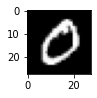

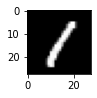

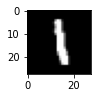

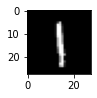

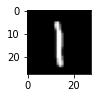

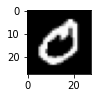

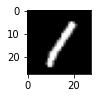

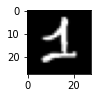

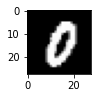

In [23]:
#first few elements of dataset
plt.figure()
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [126]:
X_new = np.where(X!=0, 1, X) #

In [127]:
class EMalg:
    def __init__(self, X, k_len):
        self.X = X
        self.K = np.arange(k_len)
        self.pkx = self.pkx_init()
        
    def pkx_init(self):
        # sum_k(pkx(k|xi)) = 1
        return np.array([np.random.dirichlet(np.ones(len(self.K)),size=1)[0] for i in range(len(self.X))])
    
    def pk_new(self, k):
        return np.sum(self.pkx[:,k])/len(self.X)
    
    def calc_pij(self, k):
        pkx = self.pkx[:,k]
        pij = np.array([[np.sum(pkx*self.X[:,i,j])/np.sum(pkx) for j in range(28)] for i in range(28)])
        return pij
    
    def calc_pkx(self,X, k):
        Pij = np.where(X!=1, 1, self.pij[k])
        Inv_Pij = np.where(X!=0,1,1-self.pij[k])
        s = 0
        for k_ in self.K:
            if k_ == k:
                continue
            A = np.where(X!=1, 1, self.pij[k_])*np.where(X!=0,1,1-self.pij[k])/(Pij*Inv_Pij)
            s+=np.prod(A)*self.pk[k_]/self.pk[k]
        pkx = 1/(1 + s)
        return pkx
    
    def maximize(self):
        pij, pk = [], []
        for k in self.K:
            pk.append(self.pk_new(k))
            pij.append(self.calc_pij(k)) 
    
        self.pk = pk
        self.pij = pij
    
    def alg(self):
        for i in range(5):
            self.maximize()
            self.pkx=np.array([[self.calc_pkx(x,k) for k in self.K] for x in self.X])
        

In [128]:
E2 = EMalg(np.asarray(X_new), 2)
E2.alg()

C:\Users\manyasha_n_m\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in double_scalars
C:\Users\manyasha_n_m\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide


[1. 0.]


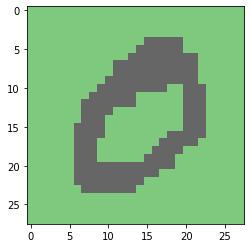

[1. 0.]


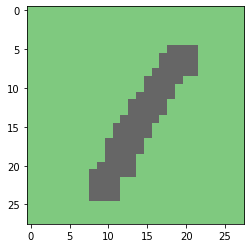

[1. 0.]


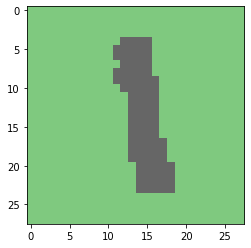

[0.007 0.993]


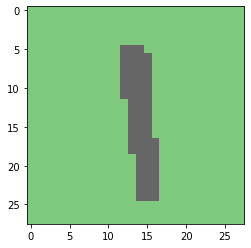

[0. 1.]


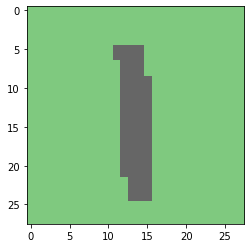

[1. 0.]


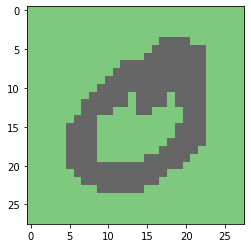

[1. 0.]


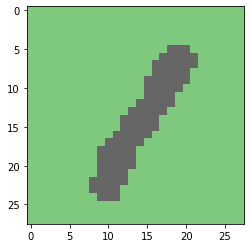

[1. 0.]


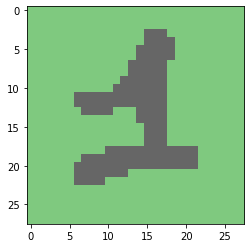

[1. 0.]


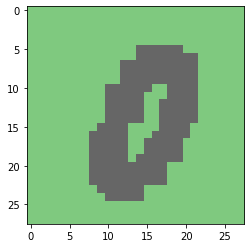

[1. 0.]


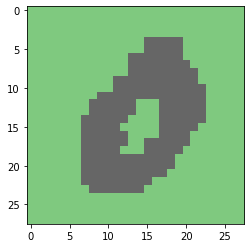

[0. 1.]


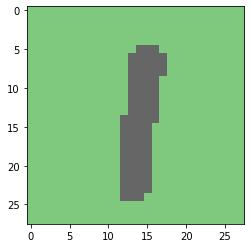

[1. 0.]


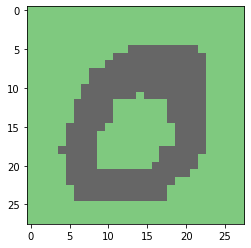

[1. 0.]


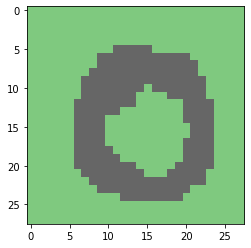

[1. 0.]


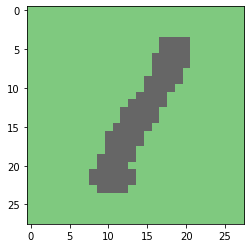

[1. 0.]


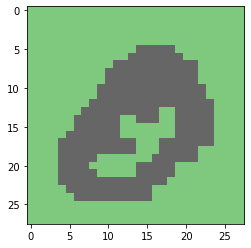

[1. 0.]


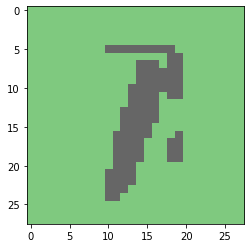

[1. 0.]


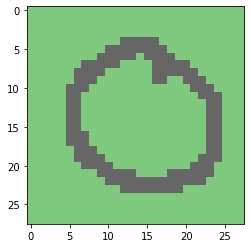

[1. 0.]


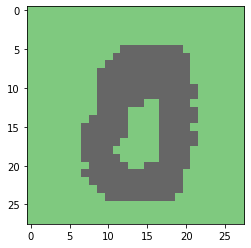

[1. 0.]


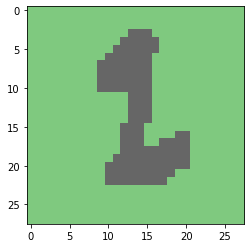

[0. 1.]


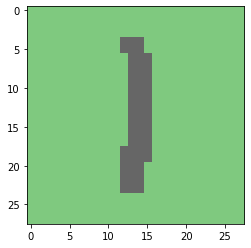

[1. 0.]


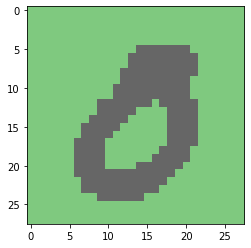

[1. 0.]


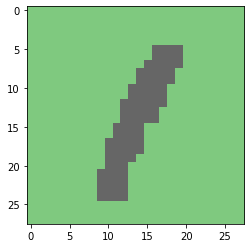

[1. 0.]


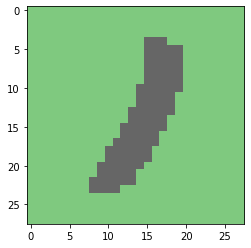

[1. 0.]


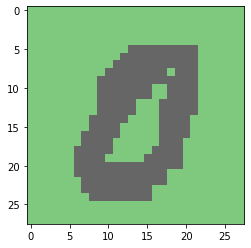

[1. 0.]


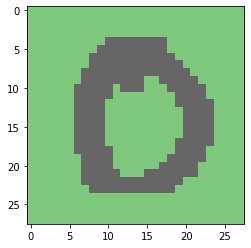

[1. 0.]


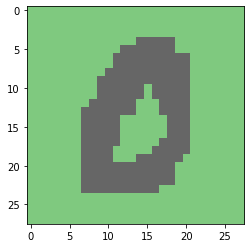

[1. 0.]


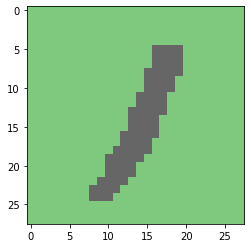

[0. 1.]


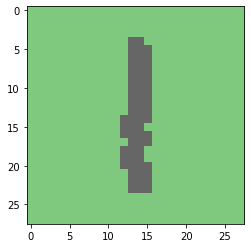

[1. 0.]


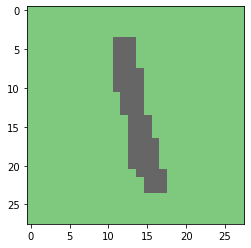

[1. 0.]


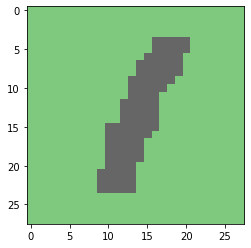

[1. 0.]


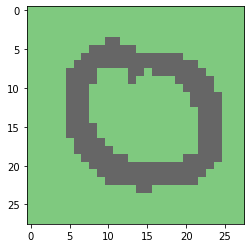

[0. 1.]


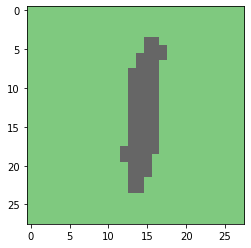

[1. 0.]


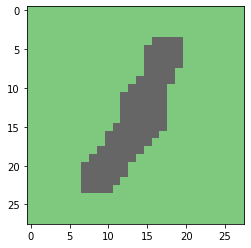

[1. 0.]


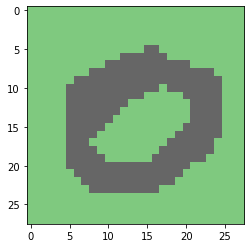

[1. 0.]


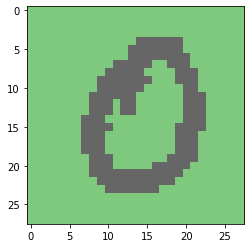

[1. 0.]


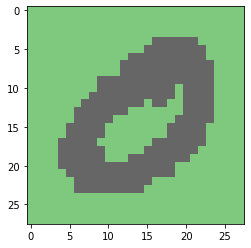

[1. 0.]


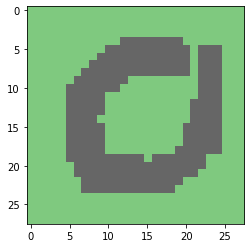

[0. 1.]


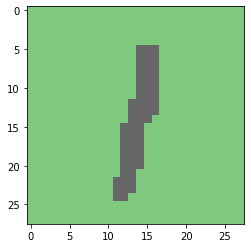

[0. 1.]


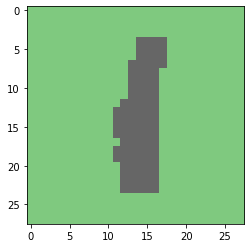

[1. 0.]


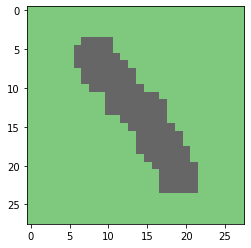

In [129]:
for i, k in enumerate(E2.pkx[:40]):  
    print(np.round(k,3))
    plt.imshow(Y[i], cmap=plt.get_cmap('Accent'))
    plt.show()
    

the algorythm didn't work good:)